In [126]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
import joblib 

In [3]:
df = pd.read_csv("Medicaldataset.csv")

In [4]:
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [5]:
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [7]:
df.isnull().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

In [8]:
for i in list(df.columns):
    print("{} -- {}".format(i, df[i].value_counts().shape[0]))

Age -- 75
Gender -- 2
Heart rate -- 79
Systolic blood pressure -- 116
Diastolic blood pressure -- 73
Blood sugar -- 244
CK-MB -- 700
Troponin -- 352
Result -- 2


In [9]:
print(df.columns.tolist())

['Age', 'Gender', 'Heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin', 'Result']


In [10]:
categorical_list = ['Gender', 'Heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin', 'Result']

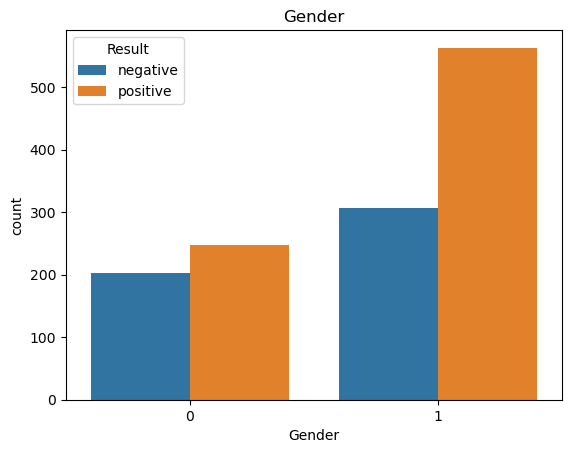

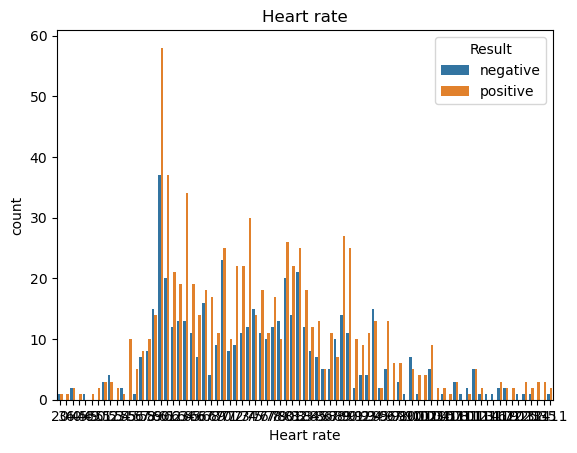

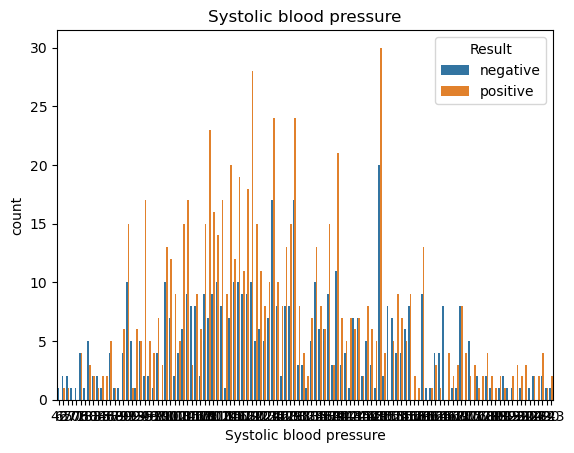

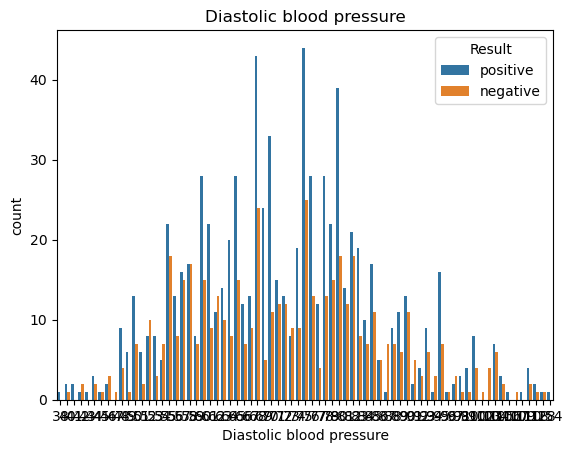

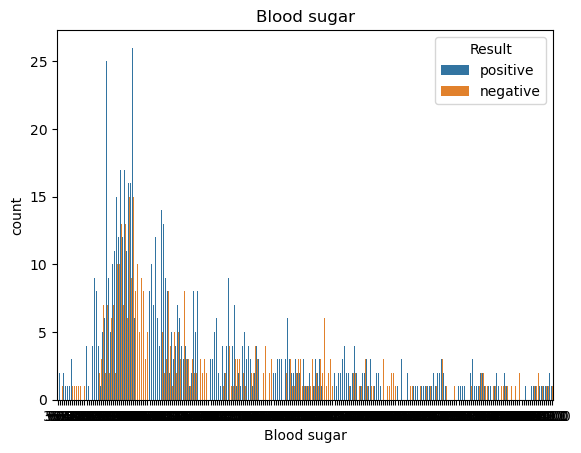

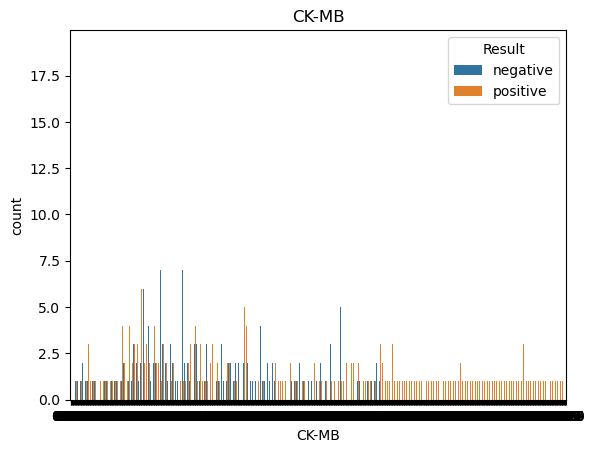

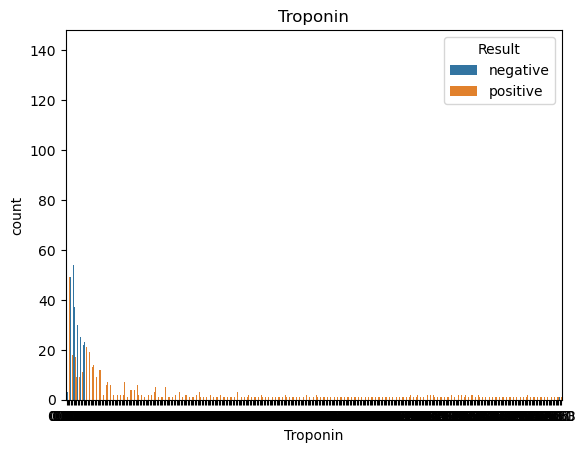

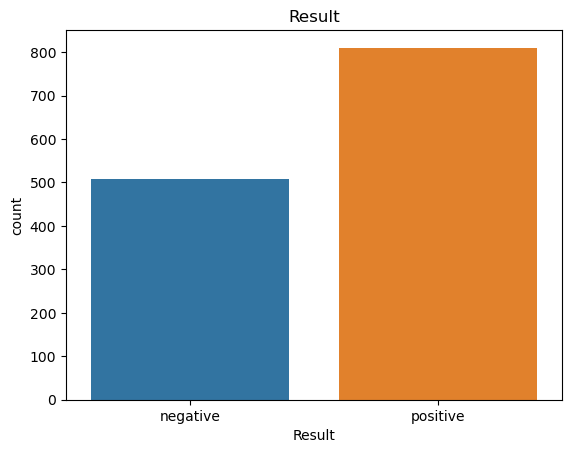

In [11]:
df_categoric = df.loc[:, categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x = i, data = df_categoric, hue = "Result")
    plt.title(i)

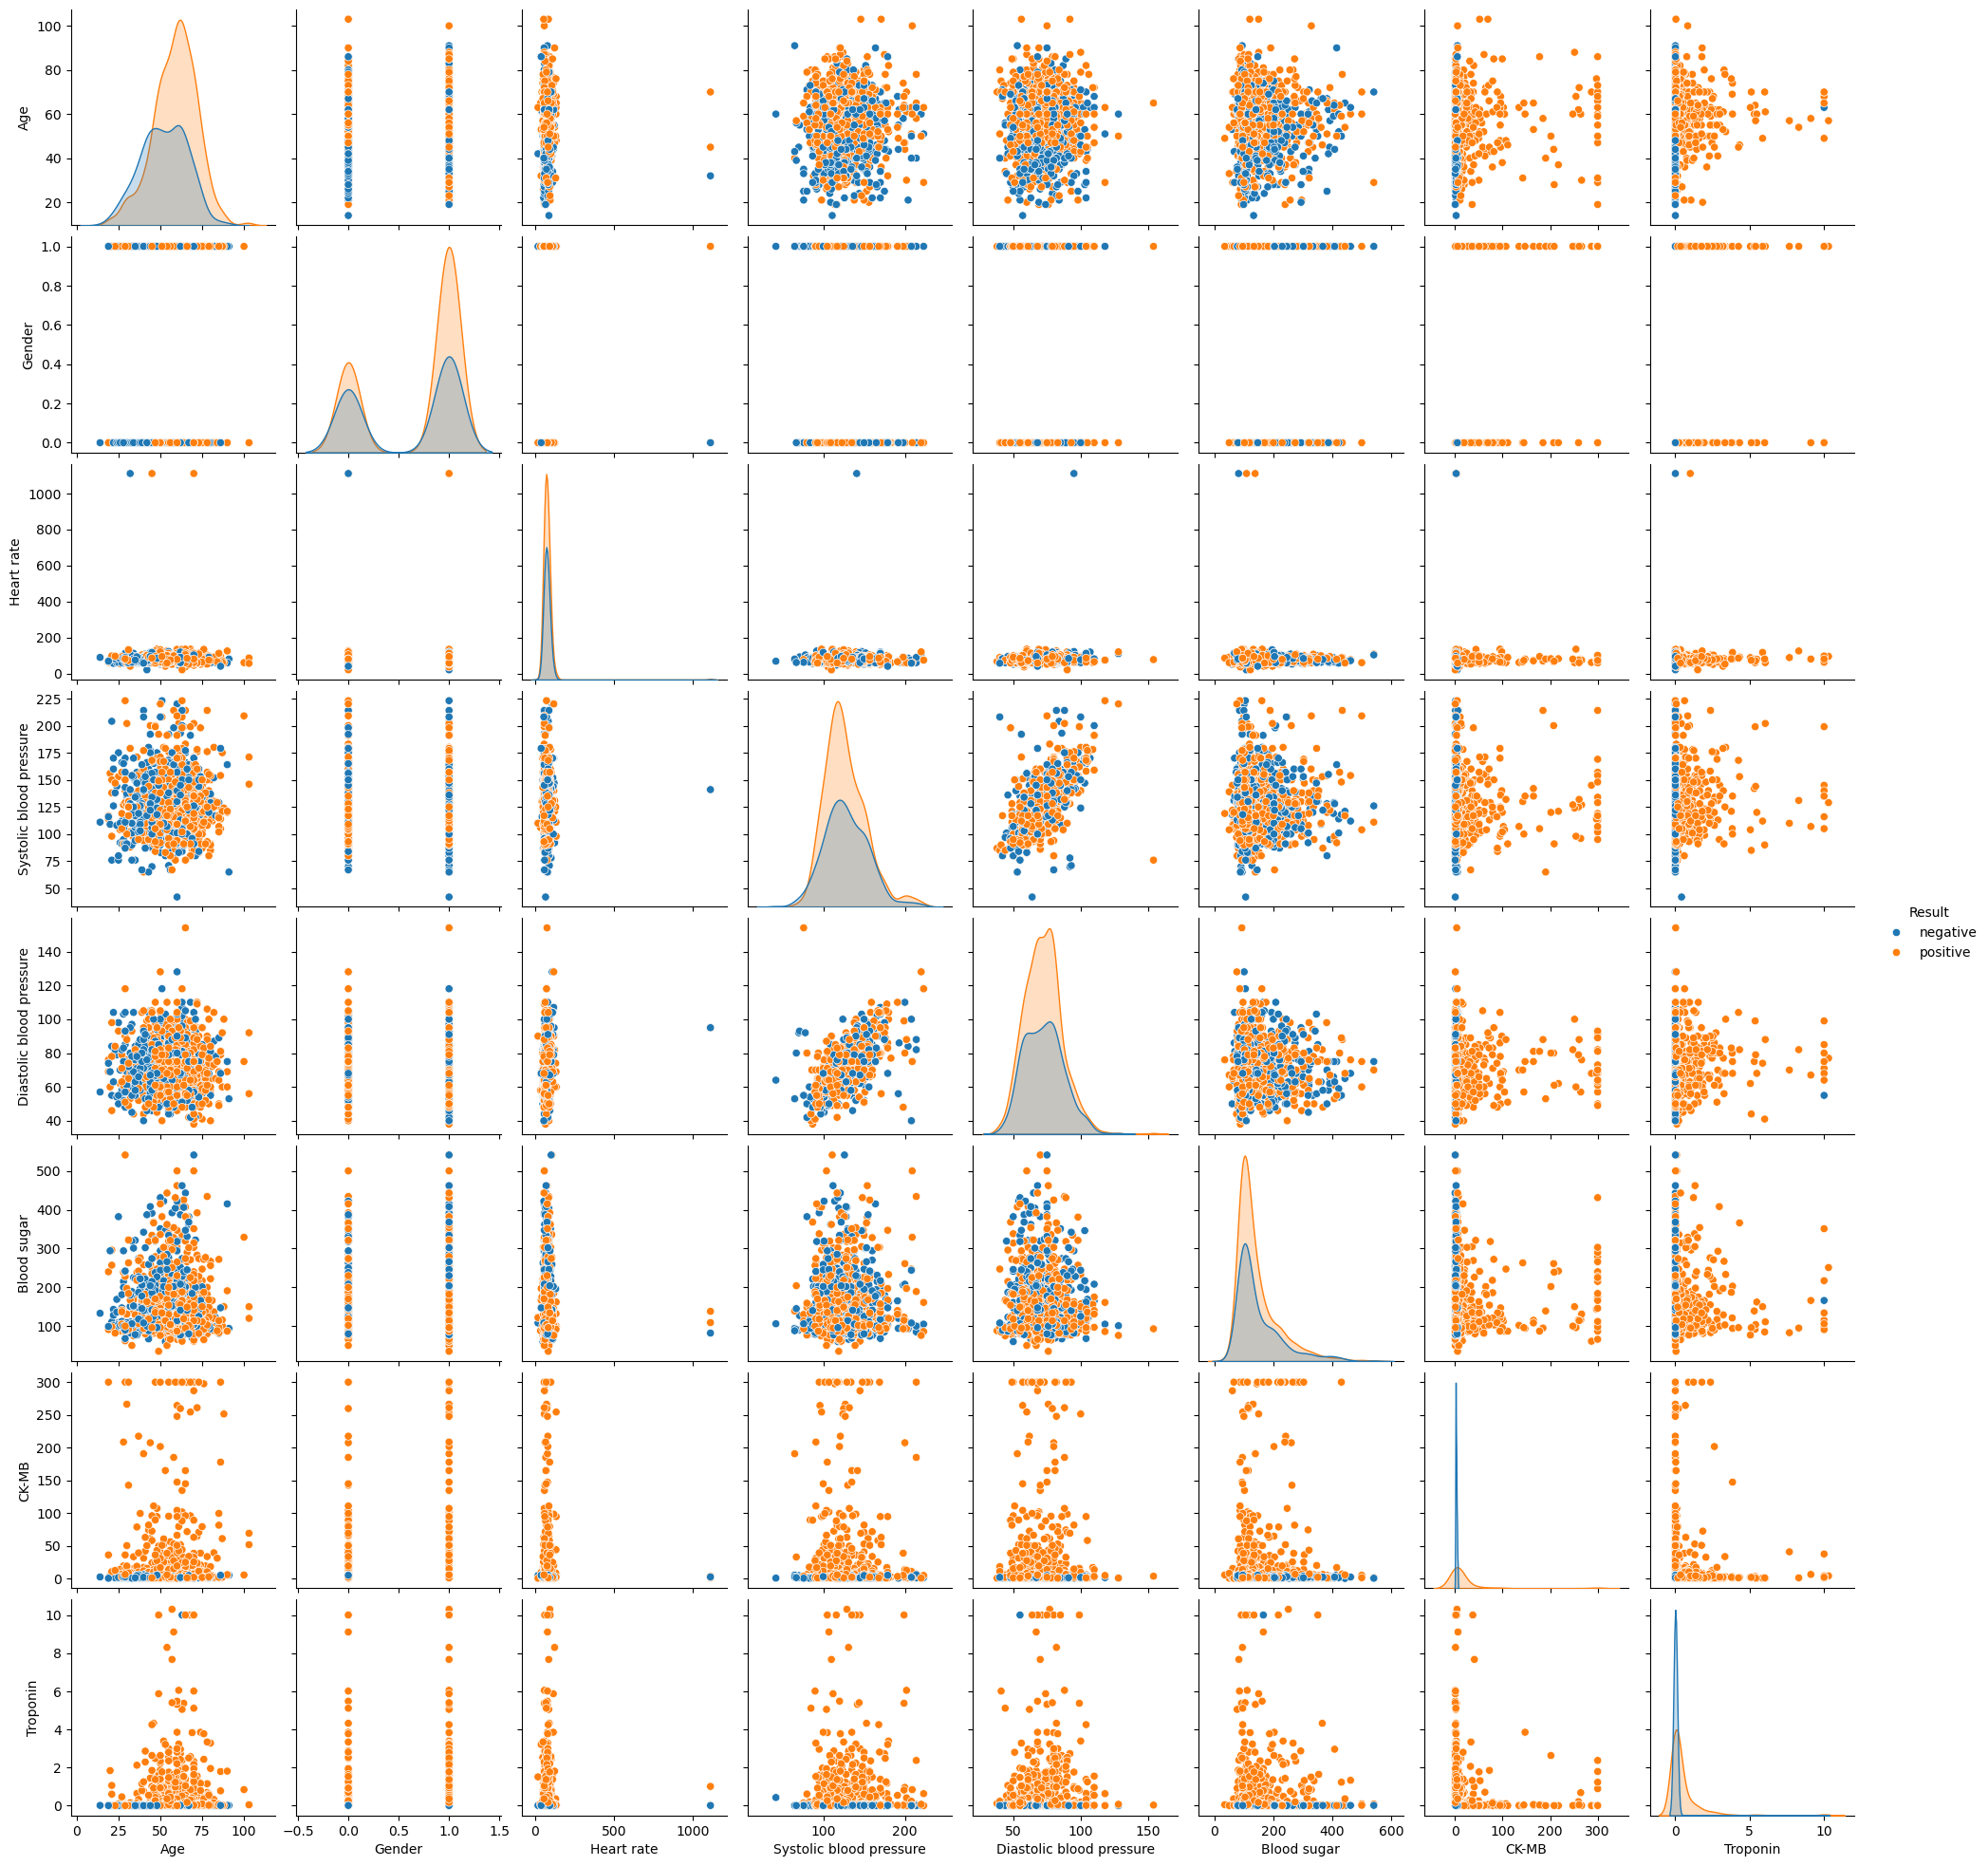

In [12]:
numeric_list = ['Age', 'Gender', 'Heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin', 'Result']

df_numeric = df.loc[:, numeric_list]
sns.pairplot(df_numeric, hue = "Result", diag_kind = "kde")
plt.show()

In [13]:
# Standardization
scaler = StandardScaler()
scaler

StandardScaler()

In [14]:
scaled_array = scaler.fit_transform(df[numeric_list[:-1]])

In [15]:
# Box Plot Analysis
df_dummy = pd.DataFrame(scaled_array, columns = numeric_list[:-1])
df_dummy.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
0,0.572358,0.718395,-0.239032,1.257215,0.764927,0.178459,-0.290962,-0.302342
1,-2.579640,0.718395,0.303491,-1.117098,-1.872542,1.994344,-0.184072,0.605701
2,-0.087363,0.718395,-0.277784,1.257215,0.337229,1.647189,-0.286859,-0.310140
3,0.572358,0.718395,-0.161529,-0.274600,-1.230995,1.647189,-0.030324,-0.207032
4,-0.087363,0.718395,-0.277784,-0.580963,-0.518166,2.047752,-0.306509,-0.310140


In [16]:
df_dummy = pd.concat([df_dummy, df.loc[:, "Result"]], axis = 1)
df_dummy.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,0.572358,0.718395,-0.239032,1.257215,0.764927,0.178459,-0.290962,-0.302342,negative
1,-2.579640,0.718395,0.303491,-1.117098,-1.872542,1.994344,-0.184072,0.605701,positive
2,-0.087363,0.718395,-0.277784,1.257215,0.337229,1.647189,-0.286859,-0.310140,negative
3,0.572358,0.718395,-0.161529,-0.274600,-1.230995,1.647189,-0.030324,-0.207032,positive
4,-0.087363,0.718395,-0.277784,-0.580963,-0.518166,2.047752,-0.306509,-0.310140,negative


In [17]:
data_melted = pd.melt(df_dummy, id_vars = "Result", var_name = "features", value_name = "value")
data_melted.head(11)

,Result,features,value
0,negative,Age,0.572358
1,positive,Age,-2.579640
2,negative,Age,-0.087363
3,positive,Age,0.572358
4,negative,Age,-0.087363
5,negative,Age,0.132544
6,negative,Age,-1.773315
7,positive,Age,0.499056
8,negative,Age,-0.893688
9,negative,Age,0.792265


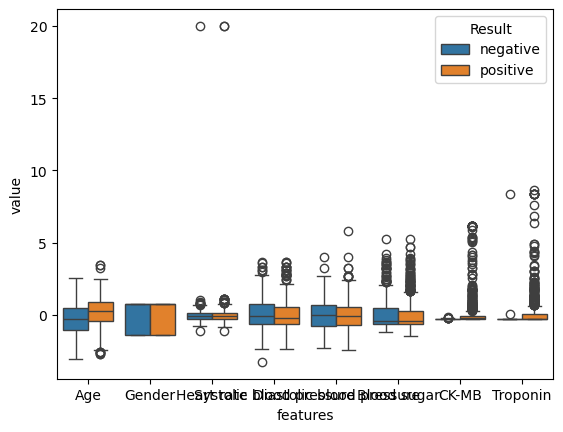

In [18]:
# box plot
plt.figure()
sns.boxplot(x = "features", y = "value", hue = "Result", data= data_melted)
plt.show()

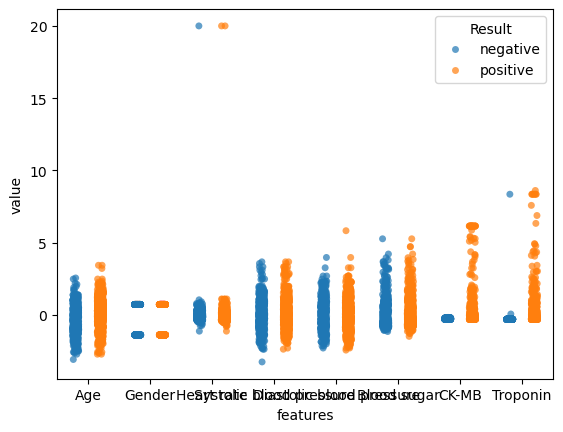

In [19]:
# Swarm Plot Analysis

plt.figure()
sns.stripplot(x="features", y="value", hue="Result", data=data_melted, jitter=True, dodge=True, alpha=0.7)
plt.show()

In [20]:
df['Result'] = df['Result'].map({0:'negative', 1:'positive'})


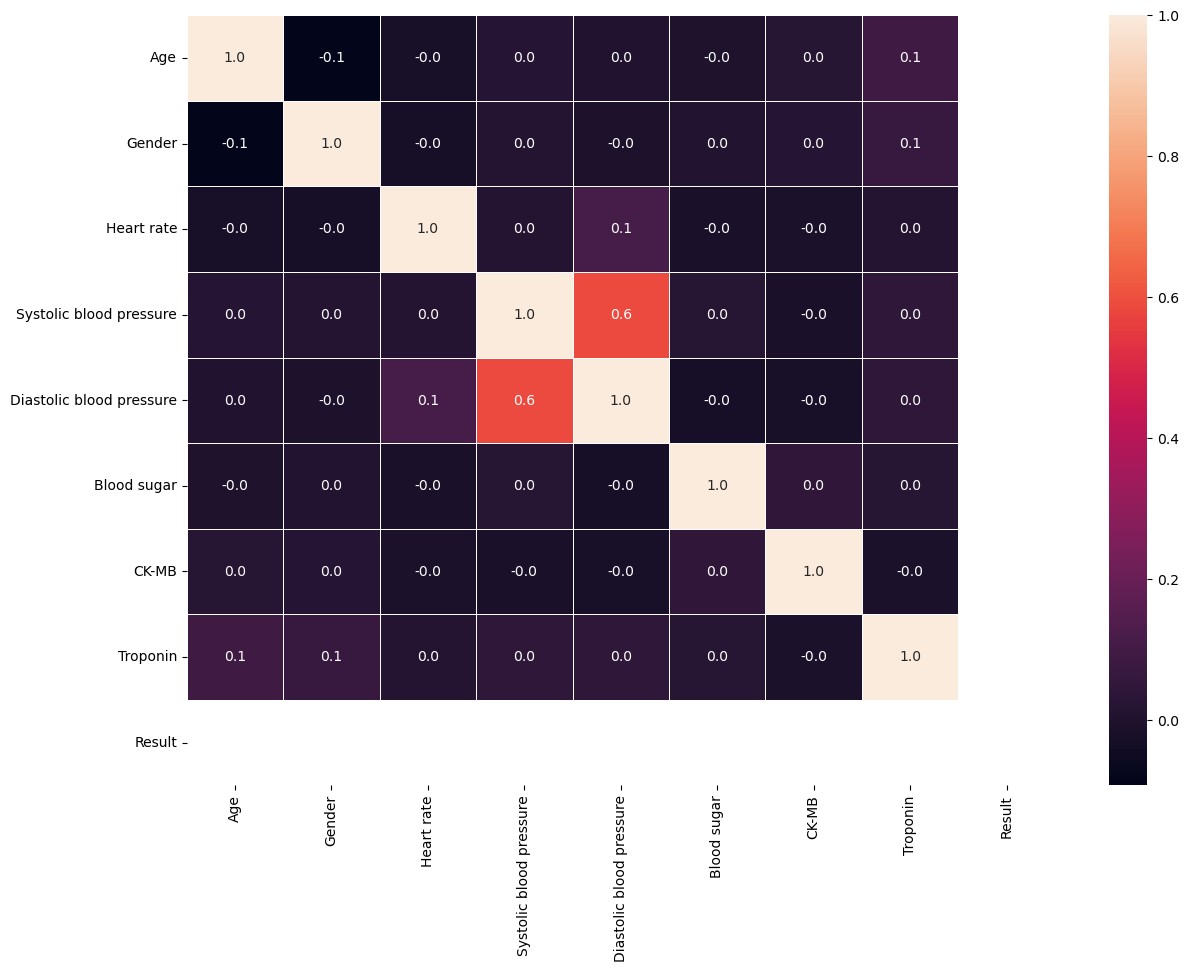

In [21]:
# Correlation Analysis
plt.figure(figsize = (14,10))
sns.heatmap(df.corr(), annot = True, fmt = ".1f", linewidths = .7)
plt.show()

Distribution of result:
Result
positive    810
negative    509
Name: count, dtype: int64


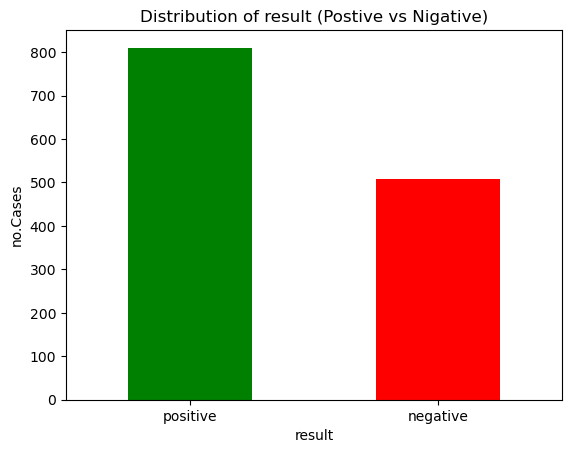

In [22]:
#Distribution of point in result

print("Distribution of result:")
print(df['Result'].value_counts())


df['Result'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of result (Postive vs Nigative)')
plt.xlabel('result')
plt.ylabel('no.Cases')
plt.xticks(rotation=0)
plt.show()

In [128]:
df = pd.read_csv("Medicaldataset.csv")

In [130]:
X = df.drop('Result', axis=1)  
y = df['Result']  

#data spiliting:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [132]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [144]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

In [146]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [150]:
svc_model = SVC(kernel='rbf', random_state=42)


svc_cv_scores = cross_val_score(svc_model, X_train_scaled, y_train_res, cv=5, scoring='accuracy')
print("SVC Cross-Validation Accuracy:", svc_cv_scores.mean())

SVC Cross-Validation Accuracy: 0.7704947472389333


In [151]:
svc_model.fit(X_train_scaled, y_train_res)

y_train_pred_svc = svc_model.predict(X_train_scaled)
train_accuracy_svc = accuracy_score(y_train_res, y_train_pred_svc)
print("SVC Training Accuracy:", train_accuracy_svc)

SVC Training Accuracy: 0.7959814528593508


In [154]:
y_pred_svc = svc_model.predict(X_test_scaled)
test_accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("SVC Test Accuracy:", test_accuracy_svc)
print(classification_report(y_test, y_pred_svc))

SVC Test Accuracy: 0.7272727272727273
              precision    recall  f1-score   support

    negative       0.62      0.73      0.67       101
    positive       0.81      0.72      0.77       163

    accuracy                           0.73       264
   macro avg       0.72      0.73      0.72       264
weighted avg       0.74      0.73      0.73       264



In [156]:
joblib.dump(svc_model, 'svc_model.pkl')

['svc_model.pkl']

In [158]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


rf_cv_scores = cross_val_score(rf_model, X_train_scaled, y_train_res, cv=5, scoring='accuracy')
print("Random Forest Cross-Validation Accuracy:", rf_cv_scores.mean())

Random Forest Cross-Validation Accuracy: 0.9899554039088923


In [160]:
rf_model.fit(X_train_scaled, y_train_res)


y_train_pred_rf = rf_model.predict(X_train_scaled)
train_accuracy_rf = accuracy_score(y_train_res, y_train_pred_rf)
print("Random Forest Training Accuracy:", train_accuracy_rf)

Random Forest Training Accuracy: 1.0


In [162]:

# دقة الاختبار
y_pred_rf = rf_model.predict(X_test_scaled)
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Test Accuracy:", test_accuracy_rf)
print(classification_report(y_test, y_pred_rf))

Random Forest Test Accuracy: 0.9772727272727273
              precision    recall  f1-score   support

    negative       0.97      0.97      0.97       101
    positive       0.98      0.98      0.98       163

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



In [164]:
joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [166]:
import joblib

rf_model = joblib.load('random_forest_model.pkl')
scaler = joblib.load('scaler.pkl')

In [172]:
new_data = pd.DataFrame({
    'Age': [64],
    'Gender': [1],
    'Heart rate': [66],
    'Systolic blood pressure': [160],
    'Diastolic blood pressure': [83],
    'Blood sugar': [160],
    'CK-MB': [1.8],
    'Troponin': [0.012]
})

new_data_scaled = scaler.transform(new_data)


prediction = rf_model.predict(new_data_scaled)
print("Predicted Result:", prediction[0])


probabilities = rf_model.predict_proba(new_data_scaled)
print("Class Probabilities:", probabilities)

Predicted Result: negative
Class Probabilities: [[1. 0.]]
